In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import mpl_toolkits.mplot3d

import scipy.sparse as sp
import scipy.sparse.linalg
import scipy.linalg as la

import dolfin
import mshr

ModuleNotFoundError: No module named 'dolfin'

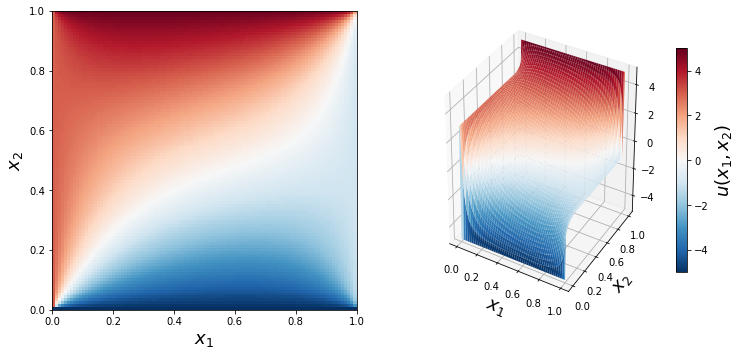

In [2]:
N = 100
u0_t, u0_b = 5, -5
u0_l, u0_r = 3, -1
dx = 1. / (N+1)
A_1d = (sp.eye(N, k=-1) + sp.eye(N, k=1) - 4 * sp.eye(N))/dx**2
A = sp.kron(sp.eye(N), A_1d) + (sp.eye(N**2, k=-N) + sp.eye(N**2,k=N))/dx**2
b = np.zeros((N, N))
b[0, :] += u0_b # bottom
b[-1, :] += u0_t # top
b[:, 0] += u0_l # left
b[:, -1] += u0_r # right
b = - b.reshape(N**2) / dx**2
v = sp.linalg.spsolve(A, b)
u = v.reshape(N, N)
U = np.vstack([np.ones((1, N+2)) * u0_b, np.hstack([np.ones((N, 1)) * u0_l, u, np.ones((N, 1)) * u0_r]), np.ones((1, N+2)) * u0_t])
x = np.linspace(0, 1, N+2)
X, Y = np.meshgrid(x, x)
fig = plt.figure(figsize=(12, 5.5))
cmap = mpl.cm.get_cmap('RdBu_r')

ax = fig.add_subplot(1, 2, 1)
c = ax.pcolor(X, Y, U, vmin=-5, vmax=5, cmap=cmap)
ax.set_xlabel(r"$x_1$", fontsize=18)
ax.set_ylabel(r"$x_2$", fontsize=18)

ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(X, Y, U, vmin=-5, vmax=5, rstride=2, cstride=2,
linewidth=0, cmap=cmap)
ax.set_xlabel(r"$x_1$", fontsize=18)
ax.set_ylabel(r"$x_2$", fontsize=18)
cb = plt.colorbar(p, ax=ax, shrink=0.75)
cb.set_label(r"$u(x_1, x_2)$", fontsize=18)

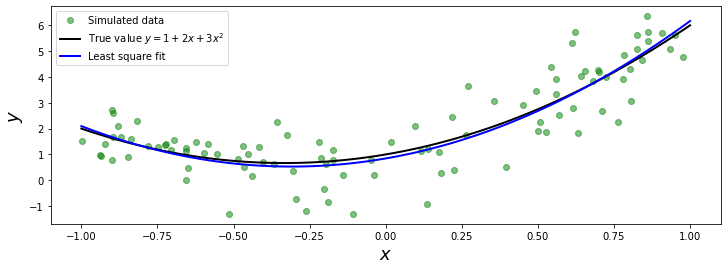

In [3]:
from scipy.linalg import lstsq

# define true model parameters
x = np.linspace(-1, 1, 100)
a, b, c = 1, 2, 3
y_exact = a + b * x + c * x**2

# simulate noisy data
m = 100
X = 1 - 2 * np.random.rand(m)
Y = a + b * X + c * X**2 + np.random.randn(m)

# fit the data to the model using linear least square
A = np.vstack([X**0, X**1, X**2]) # see np.vander for alternative
sol, r, rank, sv = lstsq(A.T, Y)
y_fit = sol[0] + sol[1] * x + sol[2] * x**2

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(X, Y, 'go', alpha=0.5, label='Simulated data')
ax.plot(x, y_exact, 'k', lw=2, label='True value $y = 1 + 2x +3x^2$')
ax.plot(x, y_fit, 'b', lw=2, label='Least square fit')
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend(loc=2)